# EDA and Preprocessing

In [1]:
import numpy as np 
import pandas as pd
import os
import ast
data=pd.read_csv('/kaggle/input/ieee-xplore-paper-details/papers.csv')
data=data.dropna().reset_index(drop=True)
data=data.drop('link',axis=1)
data['text']=data.apply(lambda row: row['Title'] + row['abstract'], axis = 1)
data=data.drop('Title',axis=1)
data=data.drop('abstract',axis=1)
data['keywords']=data.apply(lambda row: ast.literal_eval(row['keywords']), axis = 1)
data

/tmp/ipykernel_23/2807701938.py:5: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/ieee-xplore-paper-details/papers.csv')


,keywords,text
0,"[Training, Degradation, Complexity theory, Ima...",Deep Residual Learning for Image RecognitionDe...
1,"[Genetic algorithms, Sorting, Computational co...",A fast and elitist multiobjective genetic algo...
2,"[Particle swarm optimization, Birds, Education...",Particle swarm optimizationA concept for the o...
3,"[Computer architecture, Convolutional codes, S...",Going deeper with convolutionsWe propose a dee...
4,"[Computer architecture, Microprocessors, Objec...","You Only Look Once: Unified, Real-Time Object ..."
...,...,...
51679,"[Microgrids, Batteries, Energy management, Opt...",Optimal Energy Management for a Residential Mi...
51680,"[Programmable control, Adaptive control, Itera...",An adaptive iterative learning control algorit...
51681,"[Fuzzy sets, Fuzzy systems, Power system model...",Compact and transparent fuzzy models and class...
51682,"[Mobile handsets, Resource management, Servers...",Smart Resource Allocation for Mobile Edge Comp...


In [2]:
keyword_count={}
for i in data['keywords']:
    for keyword in i:
        try:
            keyword_count[keyword]+=1
        except:
            keyword_count[keyword]=1
print(len(keyword_count.keys()))

3008


Text(0.5, 1.0, 'Frequency of Instance Occurrences')

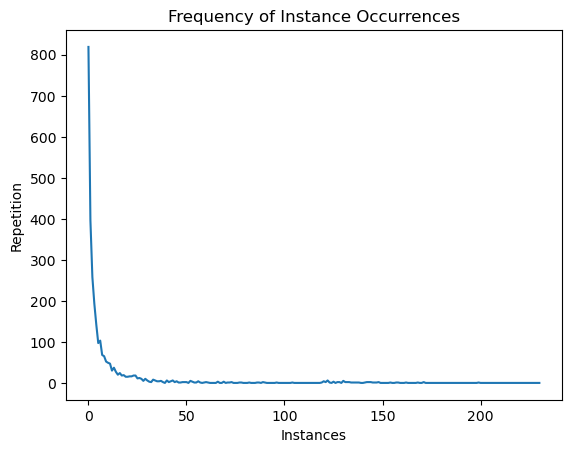

In [3]:
from matplotlib import pyplot as plt
from collections import Counter
import collections
distribution=Counter(list(keyword_count.values()))
sorted_count=sorted(distribution.items())
sorted_count= [i[1] for i in sorted_count]
plt.plot(sorted_count)
plt.xlabel('Instances')
plt.ylabel('Repetition')
plt.title('Frequency of Instance Occurrences')


In [4]:
threshold = 20
common_keywords = [key for key, value in keyword_count.items() if value > threshold]
len(common_keywords)

510

In [5]:
print(common_keywords[:20])

['Training', 'Degradation', 'Complexity theory', 'Image recognition', 'Neural networks', 'Visualization', 'Image segmentation', 'Genetic algorithms', 'Computational complexity', 'Evolutionary computation', 'Computational modeling', 'Testing', 'Decision making', 'Constraint optimization', 'Particle swarm optimization', 'Birds', 'Educational institutions', 'Humans', 'Optimization methods', 'Artificial neural networks']


In [6]:
import json
ohe_map={}
for i,keyword in enumerate(common_keywords):
    ohe_map[i]=keyword
with open("keys_encoded.json", "w") as fp:
  json.dump(ohe_map, fp)

In [7]:
keywords=[]
common_keywords= set(common_keywords)
refined_keys=[]
for i in data['keywords']:
    key_i=[]
    for key in i:
        if(key in common_keywords):
            key_i.append(key)
    refined_keys.append(key_i)


In [8]:
print(refined_keys[:5])

[['Training', 'Degradation', 'Complexity theory', 'Image recognition', 'Neural networks', 'Visualization', 'Image segmentation'], ['Genetic algorithms', 'Computational complexity', 'Evolutionary computation', 'Computational modeling', 'Testing', 'Decision making', 'Constraint optimization'], ['Particle swarm optimization', 'Birds', 'Educational institutions', 'Testing', 'Humans', 'Genetic algorithms', 'Optimization methods', 'Artificial neural networks', 'Performance evaluation'], ['Computer architecture', 'Convolutional codes', 'Sparse matrices', 'Neural networks', 'Visualization', 'Object detection', 'Computer vision'], ['Computer architecture', 'Microprocessors', 'Object detection', 'Training', 'Real-time systems', 'Neural networks', 'Pipelines']]


In [9]:
max([len(k) for k in refined_keys]) # height number of common keywords present in a paper

10

In [10]:
no_match=[] #papers having no common keywords
ohe_refined=[]
for i, keys in enumerate(refined_keys):
    found_one=False
    ohe=[]
    for val, key in ohe_map.items():
        if(key in keys):
            found_one=True
            ohe.append(1)
        else:
            ohe.append(0)
    ohe_refined.append(ohe)
    if(not found_one):
        no_match.append(i)    

In [11]:
len(no_match) 

22

In [12]:
data['keywords_ohe']=ohe_refined
data['keywords']=refined_keys
data

,keywords,text,keywords_ohe
0,"[Training, Degradation, Complexity theory, Ima...",Deep Residual Learning for Image RecognitionDe...,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[Genetic algorithms, Computational complexity,...",A fast and elitist multiobjective genetic algo...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ..."
2,"[Particle swarm optimization, Birds, Education...",Particle swarm optimizationA concept for the o...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ..."
3,"[Computer architecture, Convolutional codes, S...",Going deeper with convolutionsWe propose a dee...,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[Computer architecture, Microprocessors, Objec...","You Only Look Once: Unified, Real-Time Object ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
51679,"[Microgrids, Batteries, Energy management, Opt...",Optimal Energy Management for a Residential Mi...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
51680,"[Programmable control, Adaptive control, Itera...",An adaptive iterative learning control algorit...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
51681,"[Fuzzy sets, Fuzzy systems, Power system model...",Compact and transparent fuzzy models and class...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
51682,"[Mobile handsets, Resource management, Servers...",Smart Resource Allocation for Mobile Edge Comp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
data.iloc[no_match[0]].keywords #making sure no_match has 0 refined keywords

[]

In [14]:
data=data.drop(no_match)

In [15]:
data

,keywords,text,keywords_ohe
0,"[Training, Degradation, Complexity theory, Ima...",Deep Residual Learning for Image RecognitionDe...,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[Genetic algorithms, Computational complexity,...",A fast and elitist multiobjective genetic algo...,"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, ..."
2,"[Particle swarm optimization, Birds, Education...",Particle swarm optimizationA concept for the o...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ..."
3,"[Computer architecture, Convolutional codes, S...",Going deeper with convolutionsWe propose a dee...,"[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[Computer architecture, Microprocessors, Objec...","You Only Look Once: Unified, Real-Time Object ...","[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
51679,"[Microgrids, Batteries, Energy management, Opt...",Optimal Energy Management for a Residential Mi...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
51680,"[Programmable control, Adaptive control, Itera...",An adaptive iterative learning control algorit...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
51681,"[Fuzzy sets, Fuzzy systems, Power system model...",Compact and transparent fuzzy models and class...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, ..."
51682,"[Mobile handsets, Resource management, Servers...",Smart Resource Allocation for Mobile Edge Comp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [16]:
text_size=[]
for i in range(len(data["text"])):
    text_size.append(len(data.iloc[i]['text']))
print(min(text_size)) #minimumn length of abstract+title
print(max(text_size))
print(sum(text_size)/len(text_size)) #average

211
2138
1167.515833688204


Text(0.5, 1.0, 'Size of sequence')

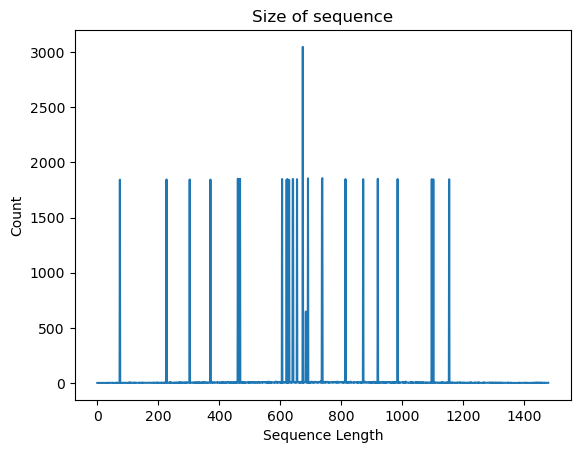

In [17]:
distribution=Counter(list(text_size))
sorted_count=sorted(distribution.items())
sorted_count= [i[1] for i in sorted_count]
plt.plot(sorted_count)
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.title('Size of sequence')

# Classification

In [18]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.1 which is incompatible.


In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from sklearn.model_selection import train_test_split
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

model_name = "distilbert-base-uncased"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name, num_labels = len(common_keywords))


hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config,)
hf_model.config.problem_type = "multi_label_classification"


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [20]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=list(ohe_map.values())))
dblock = DataBlock(blocks=blocks, get_x=ColReader('text'), get_y=ColReader('keywords_ohe'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [21]:
dls = dblock.dataloaders(data, bs=32)
torch.save(dls, "dataloader-multilable-keyword.pkl")

In [22]:
model = BaseModelWrapper(hf_model)
 
acc_05 = partial(accuracy_multi, thresh=0.5)

learner = Learner(dls, 
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_05],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

In [23]:
learner.freeze()

In [24]:
learner.fit_one_cycle(5,0.001)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.012201,0.009143,0.998740,05:07
1,0.006793,0.005818,0.998741,05:10
2,0.006252,0.005280,0.998767,05:09
3,0.005382,0.005037,0.998771,05:09
4,0.005306,0.004990,0.998778,05:08


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [25]:
learner.save("key-predict-sv-distilbert")
learner.export("keyword-predictor-distilbert.pkl")